In [1]:
from sqlalchemy import create_engine
from config import db_password
import pandas as pd
import matplotlib.pyplot as plt
from path import Path
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
db_location = 'probowl.cq2v3ncckm8b.us-east-2.rds.amazonaws.com'

In [3]:
db_string = f"postgresql://postgres:{db_password}@{db_location}/postgres"

In [4]:
engine = create_engine(db_string)

In [5]:
WR_2019_df = pd.read_sql_table('wr_2019', engine)

In [6]:
WR_2019_df.head()

,player,tm,age,pos,g,gs,cmp,pass_att,pass_yds,pass_td,...,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
0,Julian Edelman,NWE,33,WR,16,13,2,2,47,1,...,0,8,27,0,153,100,1117,6,3,False
1,Courtland Sutton,DEN,24,WR,16,14,1,1,38,0,...,0,3,17,0,124,72,1112,6,2,True
2,Emmanuel Sanders,2TM,32,WR,17,16,1,1,35,1,...,0,0,0,0,97,66,869,5,0,False
3,John Brown,BUF,29,WR,15,15,1,1,28,1,...,0,2,7,0,115,72,1060,6,0,False
4,Alex Erickson,CIN,27,WR,16,6,1,1,26,0,...,0,5,33,0,78,43,529,0,4,False


In [7]:
WR_2019_df = WR_2019_df.drop(columns=["pos","tm"])
WR_2019_df.head()

,player,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
0,Julian Edelman,33,16,13,2,2,47,1,0,0,0,8,27,0,153,100,1117,6,3,False
1,Courtland Sutton,24,16,14,1,1,38,0,0,0,0,3,17,0,124,72,1112,6,2,True
2,Emmanuel Sanders,32,17,16,1,1,35,1,0,0,0,0,0,0,97,66,869,5,0,False
3,John Brown,29,15,15,1,1,28,1,0,0,0,2,7,0,115,72,1060,6,0,False
4,Alex Erickson,27,16,6,1,1,26,0,0,0,0,5,33,0,78,43,529,0,4,False


In [8]:
WR_2019_df = WR_2019_df.set_index("player")

WR_2019_df.head()

,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
player,,,,,,,,,,,,,,,,,,,
Julian Edelman,33,16,13,2,2,47,1,0,0,0,8,27,0,153,100,1117,6,3,False
Courtland Sutton,24,16,14,1,1,38,0,0,0,0,3,17,0,124,72,1112,6,2,True
Emmanuel Sanders,32,17,16,1,1,35,1,0,0,0,0,0,0,97,66,869,5,0,False
John Brown,29,15,15,1,1,28,1,0,0,0,2,7,0,115,72,1060,6,0,False
Alex Erickson,27,16,6,1,1,26,0,0,0,0,5,33,0,78,43,529,0,4,False


In [9]:
X_train = WR_2019_df.drop(columns="pro_bowl")

In [10]:
X_train

,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb
player,,,,,,,,,,,,,,,,,,
Julian Edelman,33,16,13,2,2,47,1,0,0,0,8,27,0,153,100,1117,6,3
Courtland Sutton,24,16,14,1,1,38,0,0,0,0,3,17,0,124,72,1112,6,2
Emmanuel Sanders,32,17,16,1,1,35,1,0,0,0,0,0,0,97,66,869,5,0
John Brown,29,15,15,1,1,28,1,0,0,0,2,7,0,115,72,1060,6,0
Alex Erickson,27,16,6,1,1,26,0,0,0,0,5,33,0,78,43,529,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
De'Anthony Thomas,26,14,0,0,0,0,0,0,0,0,0,0,0,2,1,6,0,3
Krishawn Hogan,24,8,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,0
Cyril Grayson,26,2,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0


In [11]:
y_train = WR_2019_df["pro_bowl"]
y_train

player
Julian Edelman       False
Courtland Sutton      True
Emmanuel Sanders     False
John Brown           False
Alex Erickson        False
                     ...  
De'Anthony Thomas    False
Krishawn Hogan       False
Cyril Grayson        False
Darrius Shepherd     False
Quincy Enunwa        False
Name: pro_bowl, Length: 217, dtype: bool

In [14]:
WR_2020_df = pd.read_sql_table('wr_2020', engine)
WR_2020_df.head()

,player,tm,age,pos,g,gs,cmp,pass_att,pass_yds,pass_td,...,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
0,Taysom Hill,NOR,30,WR,16,8,88,121,928,4,...,0,87,457,8,12,8,98,1,10,False
1,Jarvis Landry,CLE,28,WR,15,14,4,4,74,1,...,0,4,10,1,101,72,840,3,2,True
2,Jamison Crowder,NYJ,27,WR,12,7,1,1,43,1,...,0,1,14,0,89,59,699,6,0,False
3,Jakobi Meyers,NWE,24,WR,14,9,2,2,43,2,...,0,2,9,0,81,59,729,0,1,False
4,Russell Gage,ATL,24,WR,16,8,1,2,39,1,...,0,2,9,0,109,72,786,4,0,False


In [23]:
WR_2020_df = WR_2020_df.drop(columns=["pos","tm"])
WR_2020_df.head()

,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
player,,,,,,,,,,,,,,,,,,,
Taysom Hill,30,16,8,88,121,928,4,2,0,0,87,457,8,12,8,98,1,10,False
Jarvis Landry,28,15,14,4,4,74,1,0,0,0,4,10,1,101,72,840,3,2,True
Jamison Crowder,27,12,7,1,1,43,1,0,0,0,1,14,0,89,59,699,6,0,False
Jakobi Meyers,24,14,9,2,2,43,2,0,0,0,2,9,0,81,59,729,0,1,False
Russell Gage,24,16,8,1,2,39,1,0,0,0,2,9,0,109,72,786,4,0,False


In [24]:
WR_2020_df = WR_2020_df.set_index("player")
WR_2020_df.head()

KeyError: "None of ['player'] are in the columns"

In [25]:
X_test = WR_2020_df.drop(columns="pro_bowl")
X_test.head()

,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb
player,,,,,,,,,,,,,,,,,,
Taysom Hill,30,16,8,88,121,928,4,2,0,0,87,457,8,12,8,98,1,10
Jarvis Landry,28,15,14,4,4,74,1,0,0,0,4,10,1,101,72,840,3,2
Jamison Crowder,27,12,7,1,1,43,1,0,0,0,1,14,0,89,59,699,6,0
Jakobi Meyers,24,14,9,2,2,43,2,0,0,0,2,9,0,81,59,729,0,1
Russell Gage,24,16,8,1,2,39,1,0,0,0,2,9,0,109,72,786,4,0


In [26]:
y_test = WR_2020_df["pro_bowl"]
y_test.head()

player
Taysom Hill        False
Jarvis Landry       True
Jamison Crowder    False
Jakobi Meyers      False
Russell Gage       False
Name: pro_bowl, dtype: bool

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(217, 18)
(220, 18)
(217,)
(220,)


In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [29]:
classifier.fit(X_train, y_train)

C:\Users\soren\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=200, random_state=1)

In [30]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,True,False
1,False,True
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9090909090909091


In [33]:
# Create a random forest classifier.
rf_model_WR = RandomForestClassifier(n_estimators=128, random_state=78) 

In [35]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Fitting the model
rf_model_WR = rf_model_WR.fit(X_train_scaled, y_train)

In [37]:
# Making predictions using the testing data.
predictions = rf_model_WR.predict(X_test_scaled)
predictions

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,

In [38]:
# Calculating the confusion matrix.
cm1 = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm1_df = pd.DataFrame(
    cm1, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm1_df

,Predicted 0,Predicted 1
Actual 0,201,6
Actual 1,11,2


In [40]:
# Calculating the accuracy score.
acc_score1 = accuracy_score(y_test, predictions)
acc_score1

0.9227272727272727

In [41]:
# Displaying results
print("Confusion Matrix")
display(cm1_df)
print(f"Accuracy Score : {acc_score1}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,201,6
Actual 1,11,2


Accuracy Score : 0.9227272727272727
Classification Report
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       207
        True       0.25      0.15      0.19        13

    accuracy                           0.92       220
   macro avg       0.60      0.56      0.57       220
weighted avg       0.91      0.92      0.91       220



In [42]:
# Calculate feature importance in the Random Forest model.
importances_WR = rf_model_WR.feature_importances_
importances_WR

array([0.03132602, 0.05654338, 0.06805111, 0.0058555 , 0.00442451,
       0.01267434, 0.00212978, 0.0053308 , 0.        , 0.        ,
       0.04175693, 0.0556009 , 0.00239043, 0.20491555, 0.14806833,
       0.22934807, 0.10934616, 0.0222382 ])

In [44]:
# We can sort the features by their importance.
sorted(zip(rf_model_WR.feature_importances_, X_test.columns), reverse=True)


[(0.2293480709208917, 'rec_yds'),
 (0.20491555374375234, 'tgt'),
 (0.14806833059640723, 'rec'),
 (0.10934616285668013, 'rec_td'),
 (0.06805110549357146, 'gs'),
 (0.05654338062357859, 'g'),
 (0.05560089976529567, 'rush_yds'),
 (0.04175692923639144, 'rush_att'),
 (0.03132601805070684, 'age'),
 (0.022238200356499843, 'fmb'),
 (0.012674337809840558, 'pass_yds'),
 (0.005855495331809527, 'cmp'),
 (0.005330798726352327, 'int'),
 (0.004424508535736042, 'pass_att'),
 (0.002390426988840998, 'rush_td'),
 (0.0021297809636454295, 'pass_td'),
 (0.0, 'gwd'),
 (0.0, 'fqc')]

In [45]:
import time
import numpy as np

start_time = time.time()
importances = rf_model_WR.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_WR.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.012 seconds


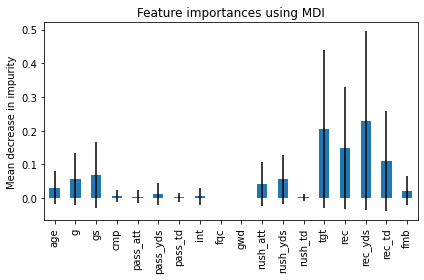

In [46]:
forest_importances_WR = pd.Series(importances_WR, index= X_test.columns)

fig, ax = plt.subplots()

forest_importances_WR.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [47]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(rf_model_WR, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

Elapsed time to compute the importances: 2.241 seconds


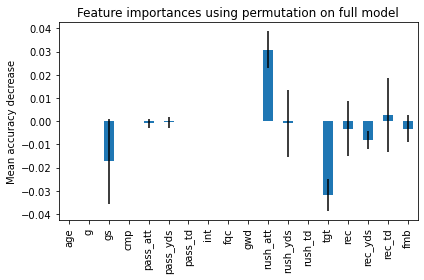

In [48]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()